# 📌 Estimating Geotechnical Parameters from CPTu Readings

This document provides a structured workflow for estimating **geotechnical parameters** based on **Cone Penetration Test with pore pressure measurements (CPTu)**.

---

## 📂 Dataset & Computational Tools

- **📊 Raw Data:** [`CPTdata.xlsx`](./CPTdata.xlsx)  
  - Contains raw CPTu readings in **kPa**.  
  - The groundwater table (GWT) is at **2.52m**
- **🛠 Calculator:** [`CPTu_processor.py`](./CPTu_processor.py)  
  - Python script for processing CPTu data and computing key parameters.

---

## 📡 **CPTu Measurements**
The CPTu test provides three primary measurements:

1. **Cone Resistance**: $ q_t $ (kPa)  
2. **Sleeve Friction**: $ f_s $ (kPa)  
3. **Porewater Pressure**: $ u_2 $ (kPa)  

In some cases, the raw CPTu data includes the **measured cone resistance** ($ q_c $), which needs to be converted to **corrected cone resistance** ($ q_t $) using the following equation:


$q_t = q_c + (1 - a_{\text{net}}) \times u_2$

where:

- $ 0.35 \leq a_{\text{net}} \leq 0.90 $ (depends on the equipment used)

---

## 🎯 **Target Geotechnical Parameters**
This analysis aims to estimate the following key soil properties:

1. **Unit weight of soil**: $ \gamma_t $  
2. **Friction angle**: $ \phi' $  
3. **Yield stress**: $ \sigma_p' $  
4. **Overconsolidation ratio (OCR)**  
5. **Lateral stress coefficient**: $ K_0 $  

These parameters are critical for understanding **soil behavior, foundation design, and slope stability analysis**.

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from CPTu_processor import *


# 📥 Read & Process CPTu Data

Extract and preprocess the required raw data from the CSV file, including:  
- **Cone resistance** $q_t$  
- **Sleeve friction** $f_s$  
- **Porewater pressure** $u_2$  
- **Depth**  

After extracting the relevant fields, the **CPTu data processor** is initialized, and subsequent calculations are conducted.


In [2]:
cpt_data=pd.read_excel('CPTdata.xlsx', skiprows=1)
cpt_data.head()
Depth = cpt_data.iloc[1:,1].astype(float).to_numpy() 
qt = cpt_data.iloc[1:,2].astype(float).to_numpy()
fs = cpt_data.iloc[1:,3].astype(float).to_numpy()
u2 = cpt_data.iloc[1:,4].astype(float).to_numpy()
processor = CPTuProcessor(qt, fs, u2, Depth, GWT=2.52)

# 📊 Visualizing CPTu Readings & Stress Distributions

This step involves plotting the **CPTu readings** along with the following stress components:  

- **Total stress** $\sigma_{v0}$
- **Hydrostatic water pressure** $u_0$ (For this case, the groundwater table (GWT) is at **2.52m**)  
- **Effective stress** $\sigma_{eff}$ 

These plots provide insights into the variation of stress and pore pressure with depth, aiding in the interpretation of subsurface conditions.


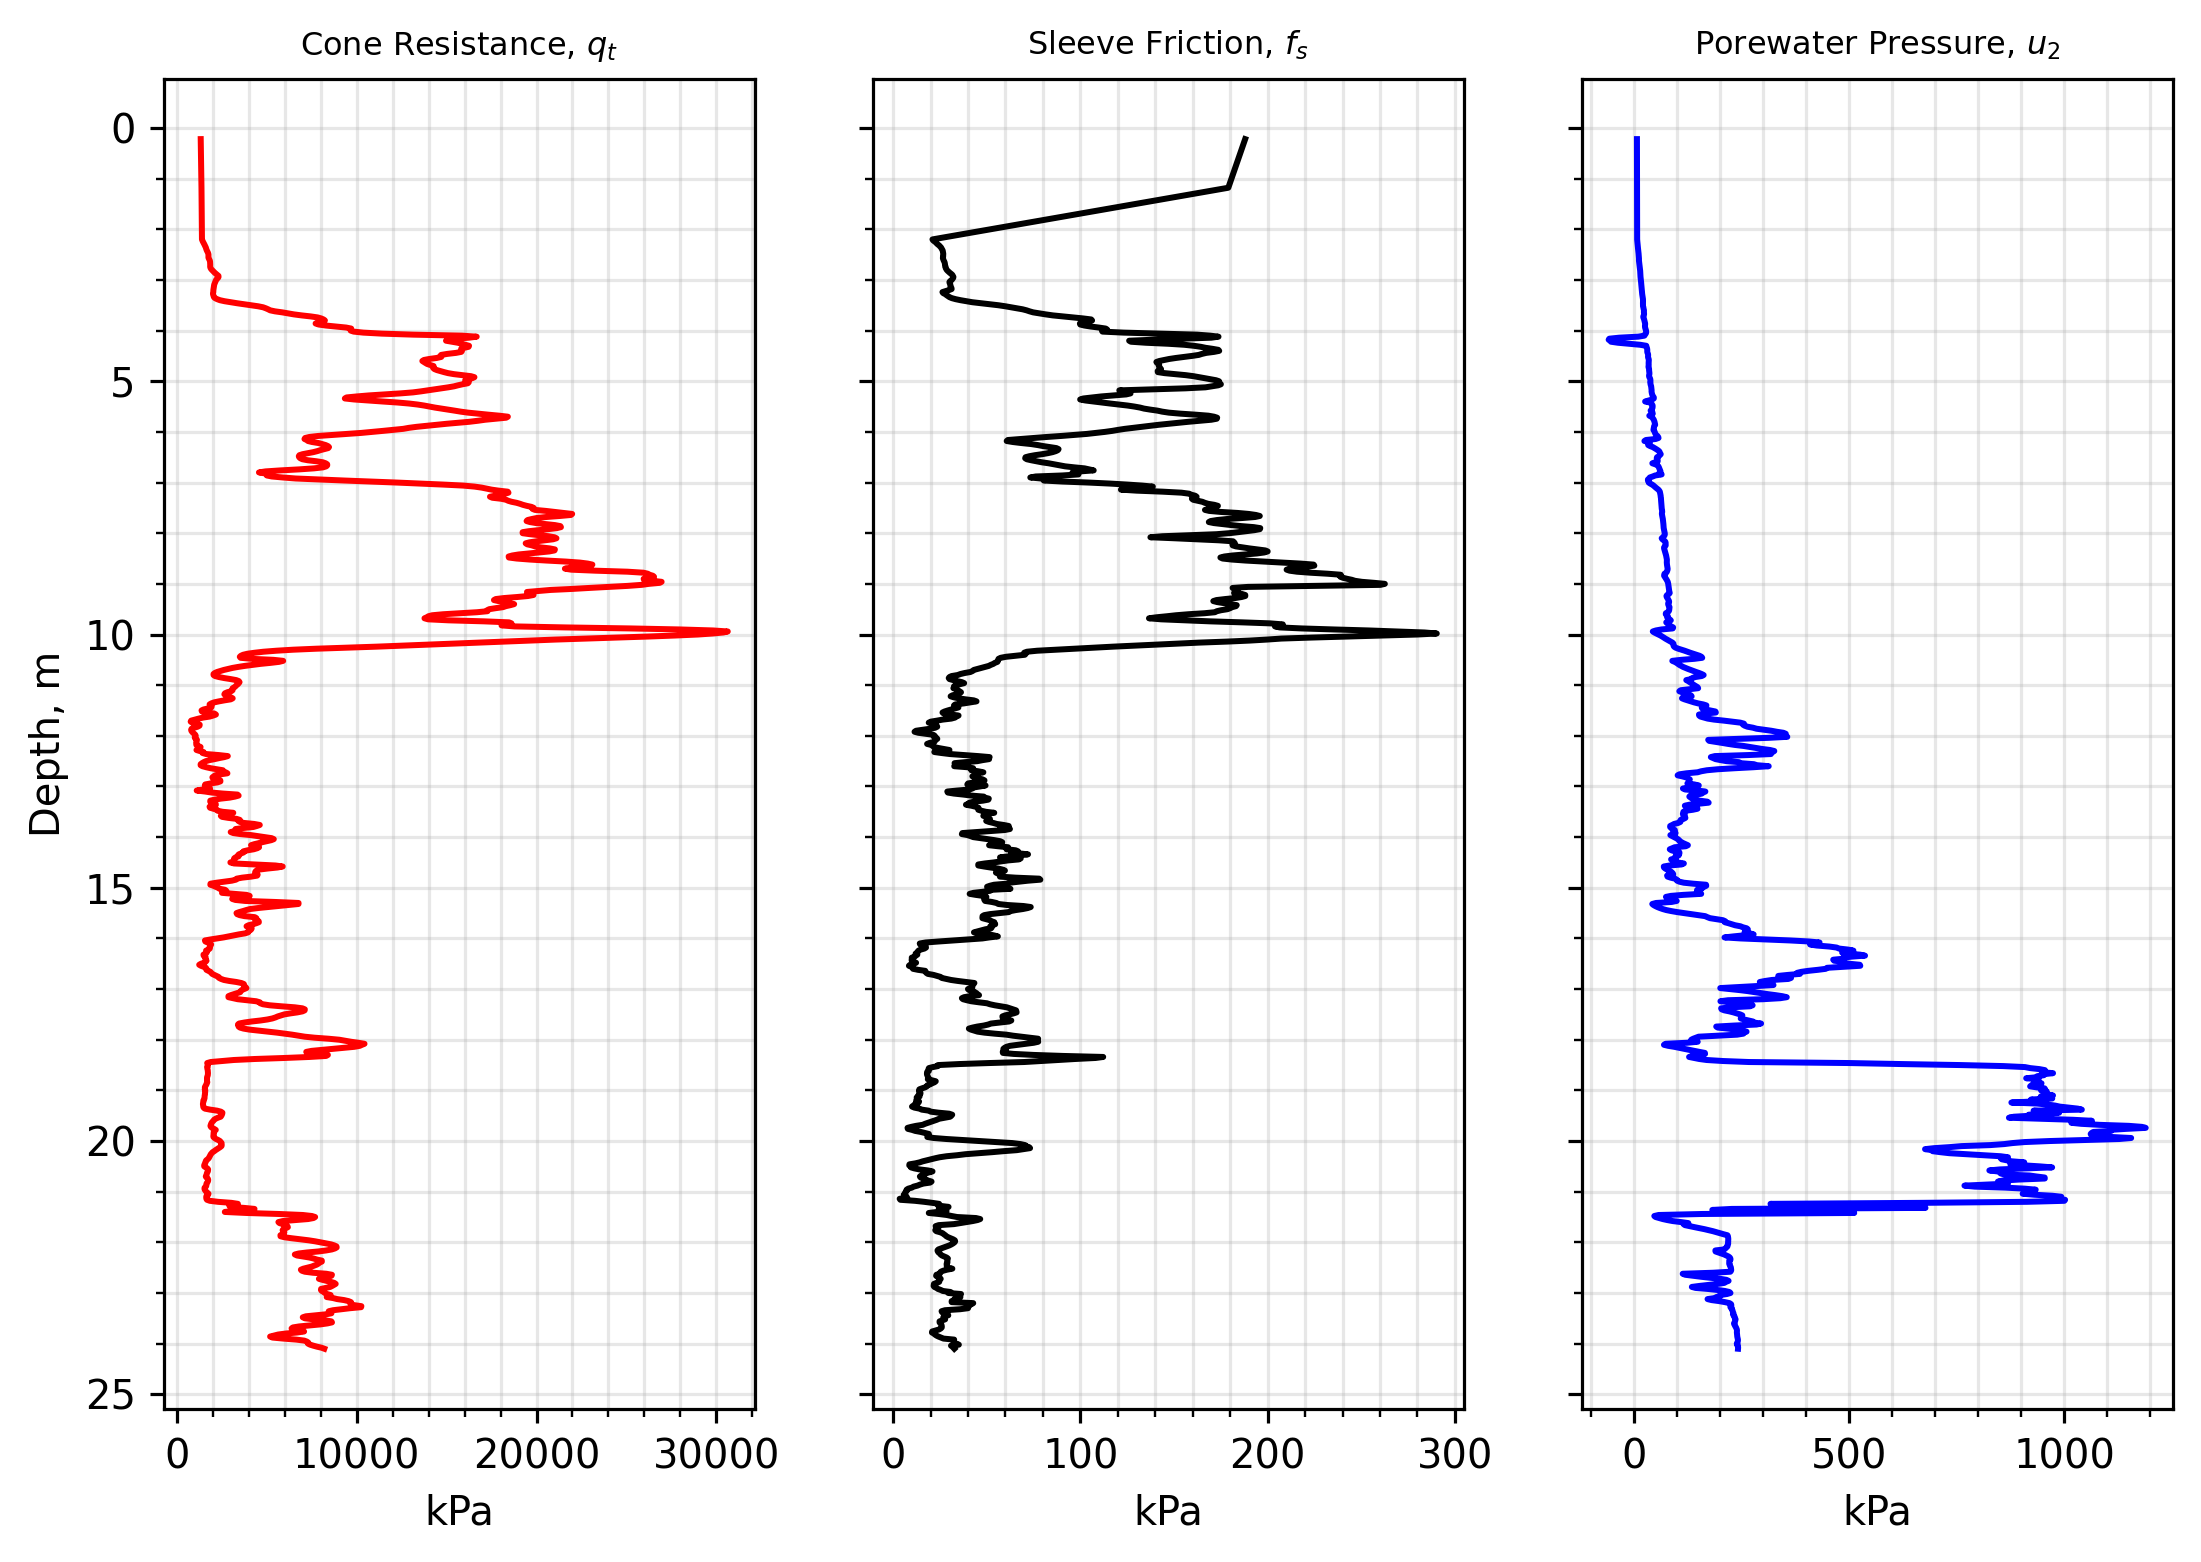

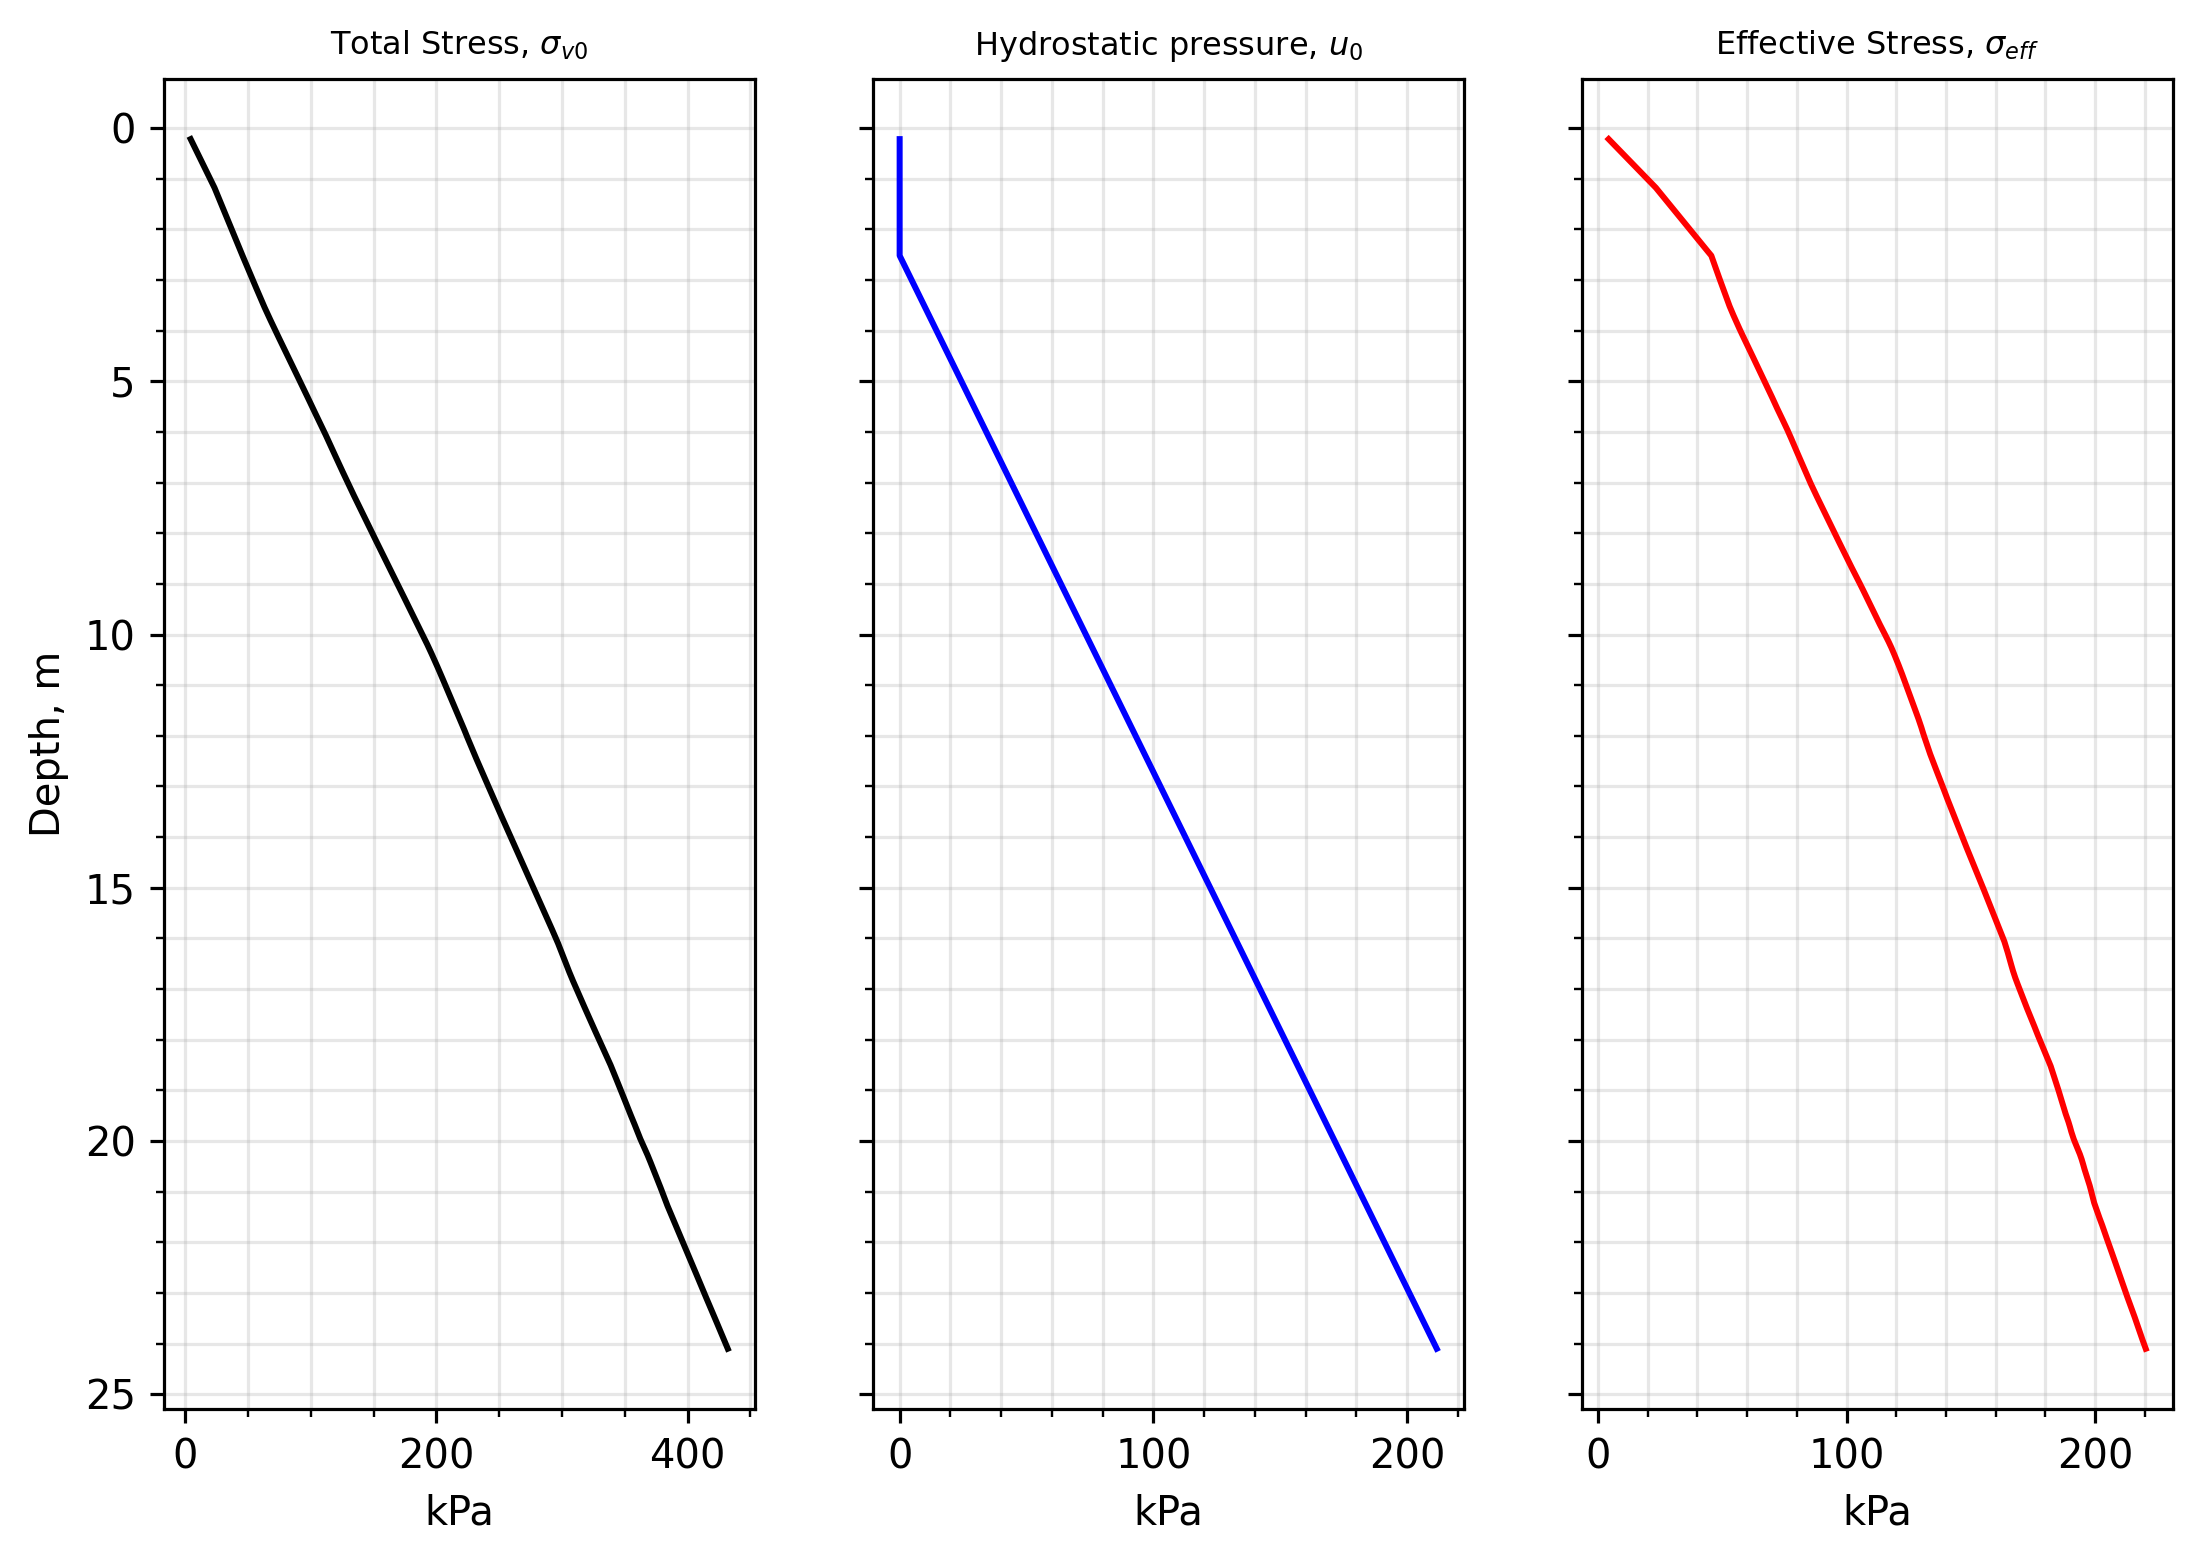

In [3]:

processor.plot_cpt_readings()
processor.plot_stresses()


# 📊 Visualization of Geotechnical Parameters

After the **characterization process**, the following five geotechnical parameters are plotted:

1. **Unit weight of soil**: $ \gamma_t $  
2. **Friction angle**: $ \phi' $
3. **Yield stress**: $ \sigma_p' $  
4. **Overconsolidation ratio (OCR)**  
5. **Lateral stress coefficient**: $ K_0 $  

Detailed calculations can be found in [`CPTu_processor.py`](./CPTu_processor.py), as well as in the references listed in the [README of this repository](https://github.com/DanielChou0916/CPTu_data_analysis/blob/main/README.md).


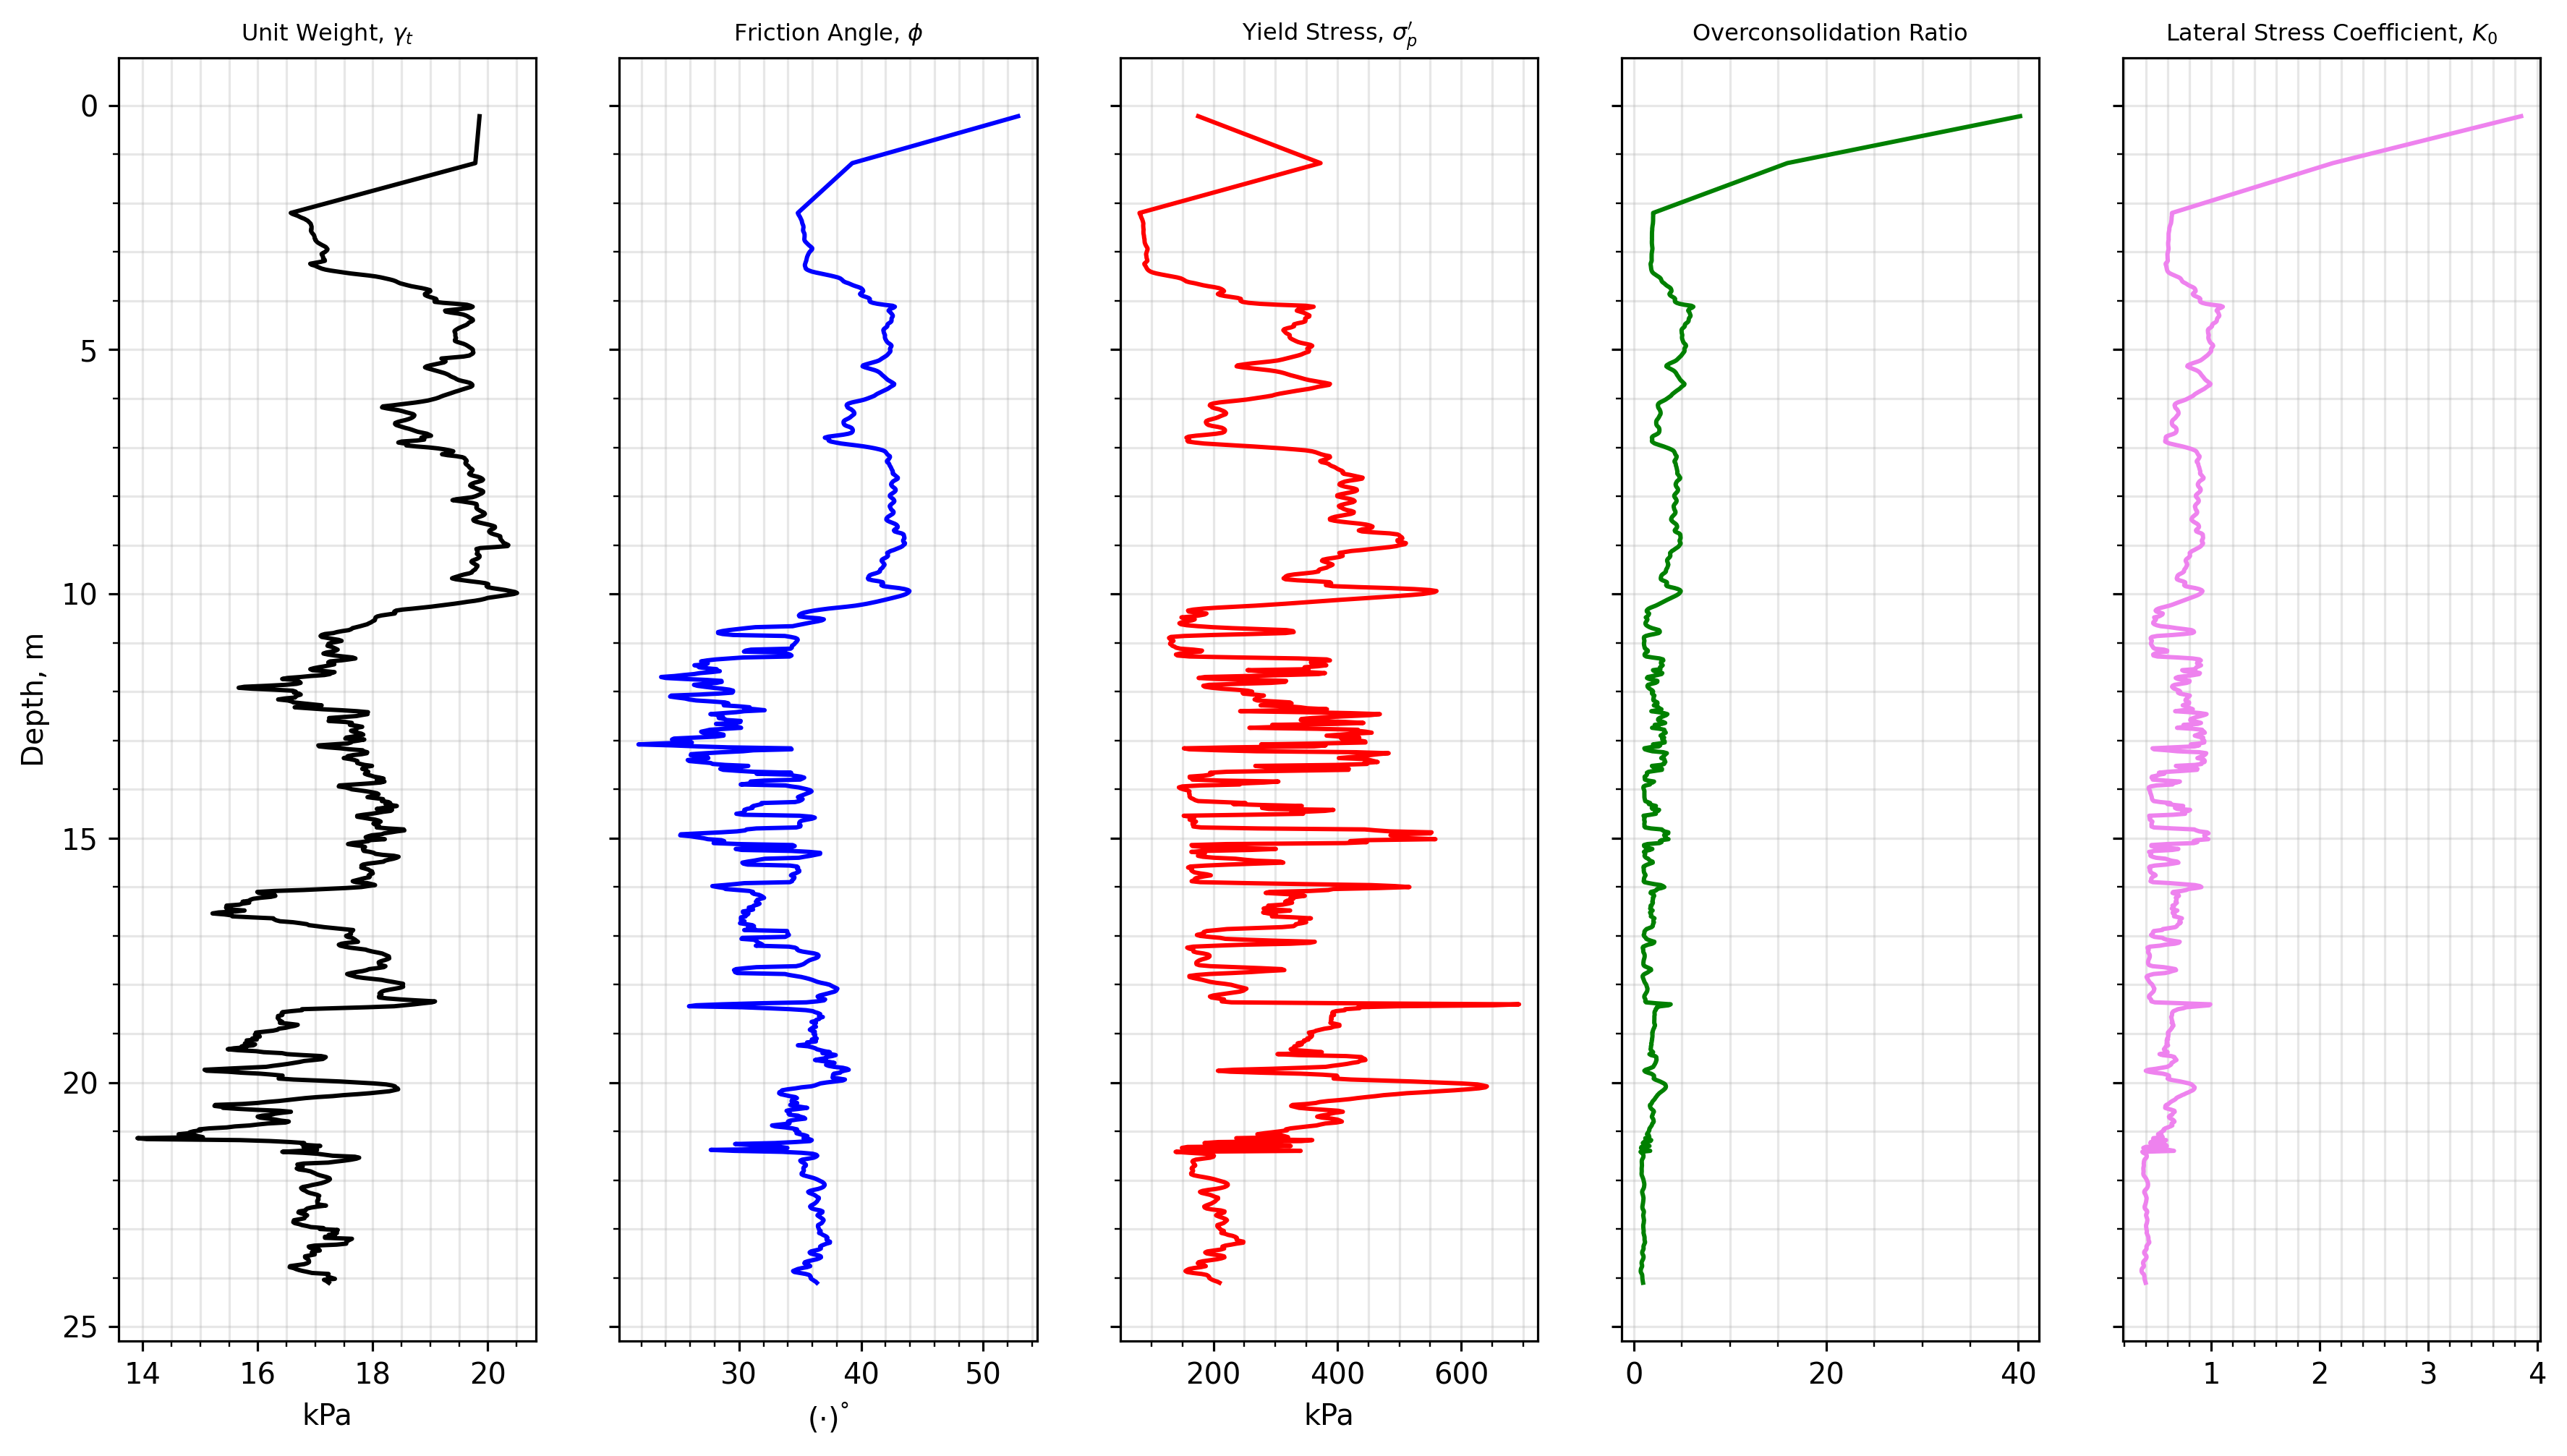

In [4]:
processor.plot_soil_parameters()